## Linear Regression

In regression, we are interested in predicting a scalar-valued target, such as the price of a stock.

By linear, we mean that the target must be predicted as a linear function of the inputs.

## Simple Linear Regression 

<img src="Images/lreg_1.png" width="600" height="600">


What elements are present in the diagram?

The black dots are the observed values of x and y.

The blue line is our least squares line.

The red lines are the residuals, which are the distances between the observed values and the least squares line.


## Mathematical formulation for linear regression

Linear regression is an approach for predicting a quantitative response using a feature or multiple features

It takes this form:

$y_i = \beta_0 + \beta_1 x_i+ \epsilon_i$

As we have $N$ sample, we can write it down in vector representation: 

${\bf y} = \beta_0 + \beta_1 {\bf x}+ {\bf \epsilon}$

The goal:

Obtain $\beta_0$ and $\beta_1$ from ${\bf x}$ and ${\bf y}$ such that we have the minimum error for $1/N \sum_{i=1}^{N}(
{\hat y}_i - y_i)^2$ 


## Activity: Write a Python code to obtain the intercept and coefficient for a simple regression problem

Task: for the given ${\bf x}$ and ${\bf y}$, obtain the $\beta_0$ and $\beta_1$. Plot the result

Steps:

1- `X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
   Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])`
                         
2- Use numpy `np.polyfit` and `np.poly1d` to obtain the linear regression model coefficients

3- Use sklearn `from sklearn.linear_model import LinearRegression` to obtain the linear regression model coefficients

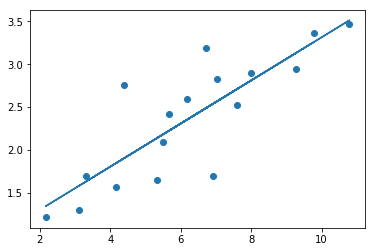

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

np.random.seed(seed=0)

# Miles ran
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
# Water consumed
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])

plt.scatter(X, Y) # This will draw us a scatter plot of the above points

# Now we want to draw a line of best fit for all of our points.
# To draw a line of best fit, we'll need to know what the slope and y-intercept
# of our line will be.

# np.polyfit, takes x and y coordinates, and the power of polynomial,
# and returns a list of [ the slope of line (m), the y intercept (b) ]
m, b = np.polyfit(X, Y, 1)
line_best_fit = list(map(lambda x: m*x + b, X)) # Applies our line equation to the given X values

# Now add our line of best fit to the graph and display the plot
plt.plot(X, line_best_fit)
plt.show()

# We can also 

## Multiple Linear Regression

This approach and model can be extended to muliple features

${\bf y} = \beta_0 + \beta_1 {\bf x}_1+ \beta_1 {\bf x}_2 + ... + {\bf \epsilon}$

Read: https://github.com/justmarkham/DAT4/blob/master/notebooks/08_linear_regression.ipynb

## Activity: Obtain the linear regression parameters for advertising data

Steps:

1- Load `Advertising.csv`

2- Use `from sklearn.linear_model import LinearRegression` and `import statsmodels.formula.api as smf` 

3- Compare the result and sklearn with ordinary least square (OLS) from statsmodels 

4- Good resource for OLS: https://www.statsmodels.org/stable/regression.html

In [14]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

data = pd.read_csv('Advertising.csv')
# create X and y
feature_cols = ['TV', 'radio', 'newspaper']
X = data[feature_cols]
y = data.sales

# follow the usual sklearn pattern: import, instantiate, fit

lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

print(lm.predict([[100, 25, 25]]))


2.9388893694594085
[ 0.04576465  0.18853002 -0.00103749]
[12.20266701]


In [9]:
import statsmodels.formula.api as smf

# create a fitted model with all three features
lm = smf.ols(formula='sales ~ TV + radio + newspaper', data=data).fit()

# print the coefficients
lm.params

Intercept    2.938889
TV           0.045765
radio        0.188530
newspaper   -0.001037
dtype: float64

## How to evaluate linear regression model?

The linear regression model can be evaluated by :

1- Mean Absolute Error (MAE)

2- Mean Squared Error (MSE)

3- Root Mean Squared Error (RMSE)

4- R-Squared -> https://github.com/cs109/2015/blob/master/Lectures/07-BiasAndRegression.pdf

Read : https://www.ritchieng.com/machine-learning-evaluate-linear-regression-model/

Read: https://www.graphpad.com/guides/prism/7/curve-fitting/r2_ameasureofgoodness_of_fitoflinearregression.htm?toc=0&printWindow

## Activity: For advertising data, compute the R-squared

In [5]:
from sklearn.metrics import r2_score

print(reg.score(X.reshape(-1, 1), Y.reshape(-1, 1)))
print(r2_score(Y.reshape(-1, 1), reg.predict(X.reshape(-1, 1))))

0.6928760302783603
0.6928760302783603


## Mathematics of Linear Regression

### This is optional to read 

For linear regression, the model parameters has closed form solution. http://pillowlab.princeton.edu/teaching/mathtools16/slides/lec10_LeastSquaresRegression.pdf 

Assuming the error as Gaussian, Least Square (LS) is identical to Maximum Likelihood Estimate (MLE)

Bonus point: Show this

Solution: http://people.math.gatech.edu/~ecroot/3225/maximum_likelihood.pdf


## Challenges 

https://github.com/Product-College-Courses/DS-2-Machine-Learning/blob/master/04_Regression_Techniques.ipynb

## Other variations of linear regression

http://scikit-learn.org/stable/modules/linear_model.html